In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
from gensim.matutils import softcossim
import gensim.downloader as api
from gensim.utils import simple_preprocess
w2v_model = api.load("glove-wiki-gigaword-50") #use word2vec model

In [138]:
# read csv of author abstracts
scraped_df = pd.read_csv('authors.csv')
text_corpus = list(scraped_df['abstracts'])
author_list = list(scraped_df['name'])


In [139]:
#2D matrix of whitespace separated words for each abstract
texts = [[word for word in document.split()] for document in text_corpus]

dictionary = corpora.Dictionary(texts) #create tokens for each unique word
similarity_index = models.WordEmbeddingSimilarityIndex(w2v_model) #similarity index using word 2 vec model
similarity_matrix = similarities.SparseTermSimilarityMatrix(similarity_index, dictionary) #similarity matrix from dictionary


In [140]:
# tokenize each abstract and store all results in bow_sentences
bow_sentences = []
for sentence in texts:
    bow_sentences.append(dictionary.doc2bow(sentence))

In [141]:
#calculate similarities between all authors
import numpy as np
num_authors = len(texts)
sims = []
for i in range(0, len(texts)):
    row = []
    for j in range(0, len(texts)):
        similarity = similarity_matrix.inner_product(bow_sentences[i], bow_sentences[j], normalized=True)
        row.append(similarity)
    sims.append(row)

In [142]:
#write similarities matrix to a df and csv, set index to author names
df = pd.DataFrame(data = sims, columns = author_list)
df['Author'] = author_list
df = df.set_index("Author")
df.to_csv("similarities_matrix.csv")

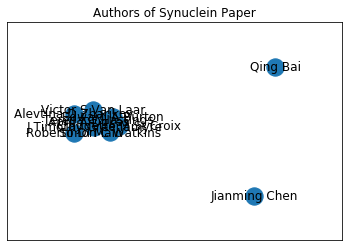

In [146]:
g = nx.Graph()
mean_value = df.mean().mean() #calculate mean similarity value of entire matrix
for i in range(0, num_authors):
    author_1 = author_list[i]
    
    for j in range(0, num_authors):
        author_2 = author_list[j]
        relation = df.values[i][j]
        #draw edge only if the similarity value is over the mean similarity value
        if relation > mean_value: 
            g.add_edge(author_1, author_2, weight = relation)
            

# write similarities matrix to a df and csv, set index to author names
nx.draw_networkx(g)
fig_title = input("What to title this paper?")
plt.margins(0.3, 0.3)
fig = plt.gcf()
fig.savefig(f'{fig_title}.png', dpi=300, bbox_inches = 'tight')



In [147]:
df

,Victor S Van Laar,Jianming Chen,Alevtina D Zharikov,Qing Bai,Roberto Di Maio,April A Dukes,Teresa G Hastings,Simon C Watkins,J Timothy Greenamyre,Claudette M St Croix,Edward A Burton
Author,,,,,,,,,,,
Victor S Van Laar,1.000000,0.586444,0.807024,0.677745,0.731839,0.898617,0.833400,0.747672,0.850501,0.749068,0.805950
Jianming Chen,0.586444,1.000000,0.439012,0.659490,0.661108,0.571383,0.591807,0.581506,0.597028,0.561823,0.568619
Alevtina D Zharikov,0.807024,0.439012,1.000000,0.618151,0.702131,0.787574,0.779222,0.724273,0.827819,0.713954,0.751960
Qing Bai,0.677744,0.659490,0.618151,1.000000,0.677433,0.694145,0.691194,0.716968,0.689681,0.737187,0.677983
Roberto Di Maio,0.731839,0.661107,0.702131,0.677433,1.000000,0.762322,0.783958,0.706707,0.813663,0.715803,0.714338
April A Dukes,0.898617,0.571383,0.787574,0.694145,0.762322,1.000000,0.814459,0.763406,0.859879,0.786305,0.801124
Teresa G Hastings,0.833400,0.591807,0.779222,0.691194,0.783958,0.814459,1.000000,0.771628,0.900009,0.765485,0.777599
Simon C Watkins,0.747672,0.581506,0.724273,0.716968,0.706707,0.763406,0.771628,1.000000,0.778170,0.892611,0.784176
J Timothy Greenamyre,0.850501,0.597028,0.827819,0.689681,0.813663,0.859879,0.900009,0.778170,1.000000,0.758564,0.797767
